<a href="https://colab.research.google.com/github/TheBoringStuffs/COVID19/blob/master/EDA_on_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

plt.rcParams['figure.figsize'] = 10, 12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!unzip "/content/covid19.zip"

Archive:  /content/covid19.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


# **Part I**
Exploratory Data Anaylsis

In [3]:
df = pd.read_csv("/content/covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
2769,2770,07/06/20,8:00 AM,Tripura,-,-,173,0,747
2770,2771,07/06/20,8:00 AM,Uttarakhand,-,-,423,11,1303
2771,2772,07/06/20,8:00 AM,Uttar Pradesh,-,-,5648,257,9733
2772,2773,07/06/20,8:00 AM,West Bengal,-,-,3119,383,7738


In [4]:
df.shape

(2774, 9)

In [5]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2774 non-null   int64 
 1   Date                      2774 non-null   object
 2   Time                      2774 non-null   object
 3   State/UnionTerritory      2774 non-null   object
 4   ConfirmedIndianNational   2774 non-null   object
 5   ConfirmedForeignNational  2774 non-null   object
 6   Cured                     2774 non-null   int64 
 7   Deaths                    2774 non-null   int64 
 8   Confirmed                 2774 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 195.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       2774 non-null   int64         
 1   Date                      2774 non-null   datetime64[ns]
 2   Time                      2774 non-null   object        
 3   State/UnionTerritory      2774 non-null   object        
 4   ConfirmedIndianNational   2774 non-null   object        
 5   ConfirmedForeignNational  2774 non-null   object        
 6   Cured                     2774 non-null   int64         
 7   Deaths                    2774 non-null   int64         
 8   Confirmed                 2774 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 195.2+ KB


In [9]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['StateID'] = le.fit_transform(df['State/UnionTerritory'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,StateID
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,17
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,17
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,17
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,17
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,17


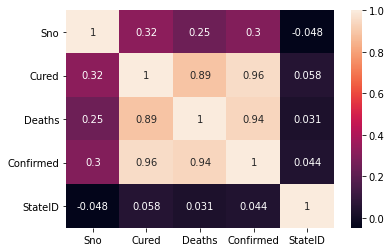

In [11]:
corr= df.corr()
sns.heatmap(corr,annot=True)

# Obeservation
There is no strong corelation between any of the variable except for Confirmed and Deaths, Confirmed and Cured.

In [12]:
print(df['State/UnionTerritory'].unique())
print("\nNumber of States impacted by COVID 2019:",len(df['State/UnionTerritory'].unique()))

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim']

Number of States impacted by COVID 2019: 37


In [13]:
group_cases=df[['Confirmed','Cured','Deaths','State/UnionTerritory']].groupby('State/UnionTerritory').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,State/UnionTerritory,Confirmed,Cured,Deaths
0,Maharashtra,1648721,522234,59523
1,Tamil Nadu,545754,253399,4199
2,Delhi,507456,199221,10114
3,Gujarat,487889,215508,28858
4,Rajasthan,259277,140846,5801


In [15]:
group_cases['Recovery Rate']=round(group_cases['Cured'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,State/UnionTerritory,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
0,Maharashtra,1648721,522234,59523,0.320000,0.040000
1,Tamil Nadu,545754,253399,4199,0.460000,0.010000
2,Delhi,507456,199221,10114,0.390000,0.020000
3,Gujarat,487889,215508,28858,0.440000,0.060000
4,Rajasthan,259277,140846,5801,0.540000,0.020000


Rajasthan leads in the recovery rate in the top 5 countries to COVID cases till now (while creation of this notebook). Tamil Nadu has cases increasing and its recovery rate is also increasing.

In [0]:
#Total active cases
df['Total Active'] = df['Confirmed'] - (df['Deaths'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 2803998


,Total Active
State/UnionTerritory,
Maharashtra,1066964
Delhi,298121
Tamil Nadu,288156
Gujarat,243523
Madhya Pradesh,119825
Rajasthan,112630
Uttar Pradesh,111497
Cases being reassigned to states,88577
West Bengal,79769


 **Visualization inference:**
*   Maharashtra, Delhi, & Tamil nadu are currently TOP 3 states with maximum number of Active Cases
*  Sikkim has minimum number of cases


In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [0]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Confirmed'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text="Trend of COVID19 Cases in India", plot_bgcolor='rgb(230, 230, 230)')
fig.show()

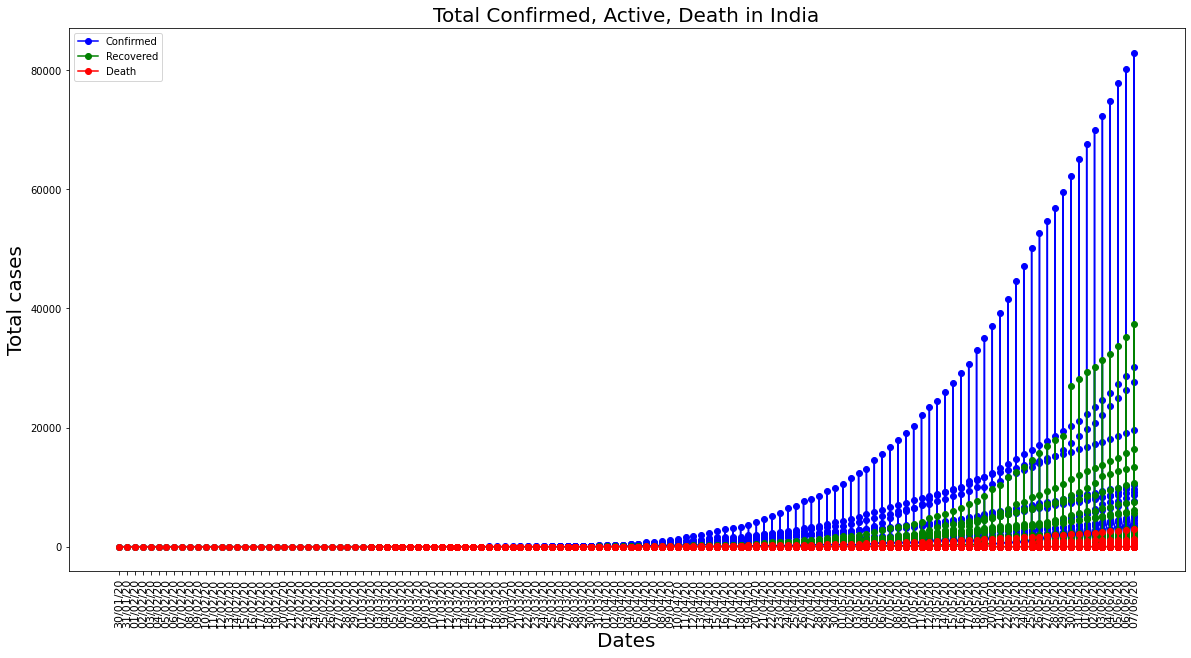

In [0]:
confirmed_cases = df['Confirmed']
death_cases = df['Deaths']
cured_cases = df['Cured']

plt.figure(figsize= (20,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y=confirmed_cases, x=df['Date'], label = 'Confirmed',linestyle ='solid',color = 'b')
ax2 = plt.plot_date(y=cured_cases, x= df['Date'], label = 'Recovered',linestyle ='solid',color = 'g')
ax3 = plt.plot_date(y=death_cases, x= df['Date'], label = 'Death',linestyle ='solid',color = 'r')
plt.legend()

,Cured,Deaths,Confirmed,Total Active
Cured,1.000000,0.891531,0.958290,0.880849
Deaths,0.891531,1.000000,0.940407,0.920859
Confirmed,0.958290,0.940407,1.000000,0.979280
Total Active,0.880849,0.920859,0.979280,1.000000


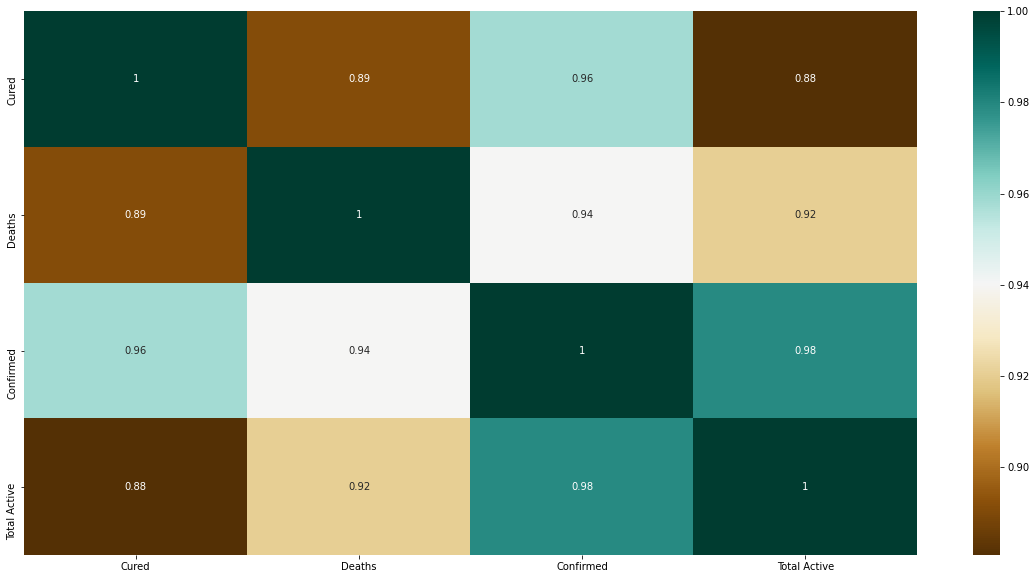

In [0]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [0]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')